<a href="https://colab.research.google.com/github/kernelpanic2015/AprendaCParaGamesUE4/blob/master/Dados_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados temporais podem revelar tendências e padrões significativos ao longo do tempo. No setor agrícola, essas informações podem abranger dados sobre temperatura, precipitação e crescimento de culturas, entre outros. Frequentemente, é necessário realizar processos de agregação ou sumarização, condensando os dados em períodos mais representativos, como médias diárias, mensais ou sazonais, para modelar efetivamente as séries temporais.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Dataset exemplo - [Download](https://drive.google.com/file/d/1_9bc-qFXfjq3YKLYKpgFFMgZEcAT8GRg/view?usp=sharing)

In [3]:
# Ler arquivo CSV
df_clima = pd.read_csv('Temperature_and_Humidity_Data.csv', index_col=0, parse_dates=True)

df_clima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-01-01 00:00:00 to 2024-01-07 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  168 non-null    float64
 1   Humidity     168 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


In [4]:
# Exibindo as 10 primeiras linhas do DataFrame
print(df_clima.head(10))


                     Temperature   Humidity
2024-01-01 00:00:00    24.483571  57.546119
2024-01-01 01:00:00    21.308678  52.462638
2024-01-01 02:00:00    25.238443  51.104856
2024-01-01 03:00:00    29.615149  51.841897
2024-01-01 04:00:00    20.829233  59.228983
2024-01-01 05:00:00    20.829315  63.411520
2024-01-01 06:00:00    29.896064  62.766908
2024-01-01 07:00:00    25.837174  68.271832
2024-01-01 08:00:00    19.652628  60.130019
2024-01-01 09:00:00    24.712800  74.535341


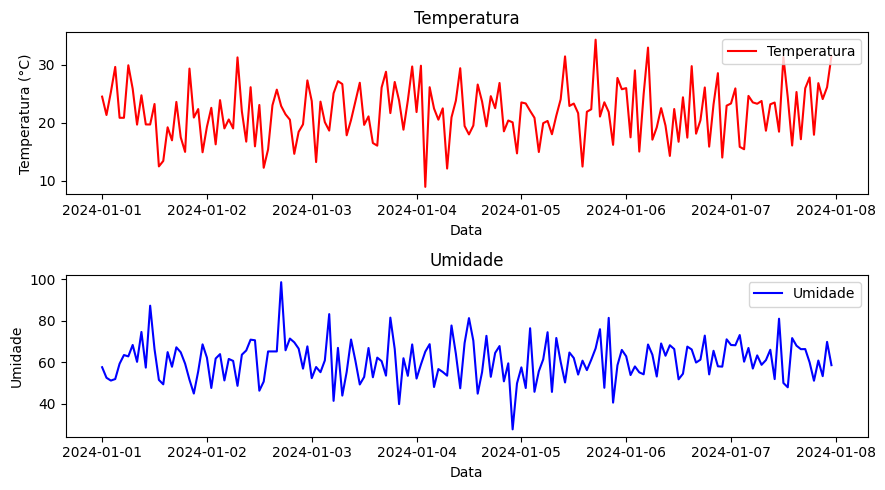

In [5]:
import matplotlib.pyplot as plt

# Plotando a série original de temperatura e umidade
plt.figure(figsize=(9, 5))
plt.subplot(2, 1, 1)  # Subplot para temperatura
plt.plot(df_clima.index, df_clima['Temperature'], label='Temperatura', color='red')
plt.title('Temperatura')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)  # Subplot para umidade
plt.plot(df_clima.index, df_clima['Humidity'], label='Umidade', color='blue')
plt.title('Umidade')
plt.xlabel('Data')
plt.ylabel('Umidade')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Criando novos DataFrames (agregação, sumarização, etc)

In [6]:
# Criando um novo DataFrame para a temperatura mínima diária
df_min_daily = df_clima[['Temperature']].resample('D').min()

# Exibindo as primeiras linhas do DataFrame resultante
print(df_min_daily.head())

            Temperature
2024-01-01    12.433599
2024-01-02    12.201649
2024-01-03    13.184799
2024-01-04     8.901274
2024-01-05    12.406144


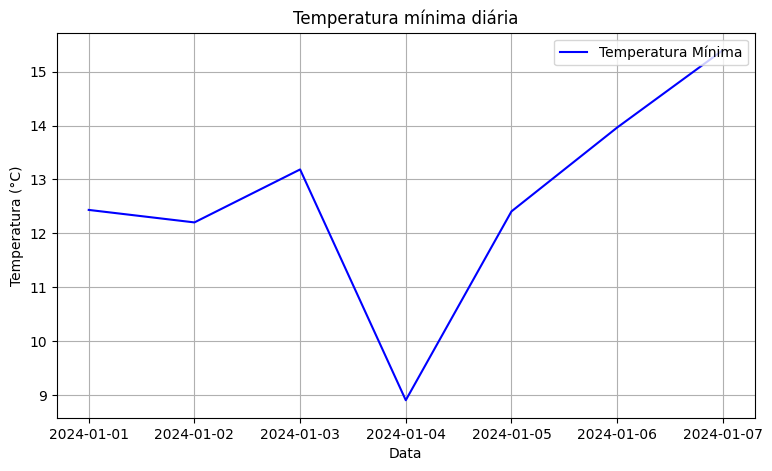

In [7]:
# Plotando a série da temperatura mínima diária
plt.figure(figsize=(9, 5))
plt.plot(df_min_daily.index, df_min_daily['Temperature'], label='Temperatura Mínima', color='blue')
plt.title('Temperatura mínima diária')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [8]:
# Criando um novo DataFrame com apenas a data e temperatura
df_temperature = df_clima[['Temperature']].copy()

# Agrupando por data (ignorando a hora) e calculando as temperaturas máximas e mínimas
df_daily_temp = df_temperature.resample('D').agg(['min', 'max'])

# Exibindo as primeiras linhas do DataFrame resultante
print(df_daily_temp.head())


           Temperature           
                   min        max
2024-01-01   12.433599  29.896064
2024-01-02   12.201649  31.261391
2024-01-03   13.184799  29.690183
2024-01-04    8.901274  29.823218
2024-01-05   12.406144  34.316211


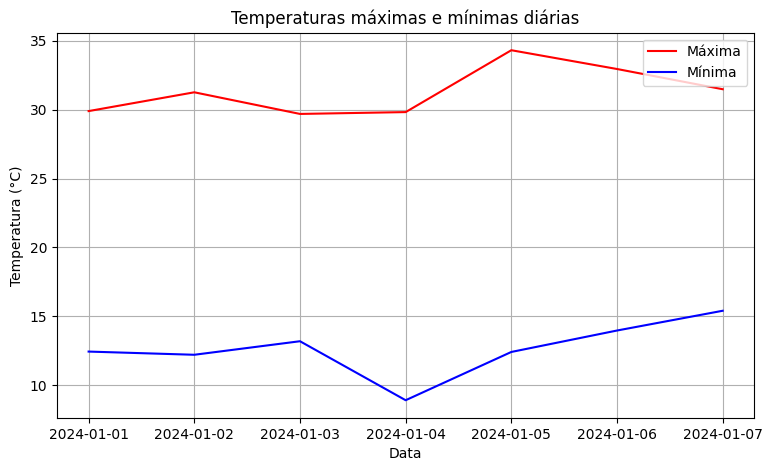

In [9]:
# Plotando a série de temperaturas máximas e mínimas diárias
plt.figure(figsize=(9, 5))
plt.plot(df_daily_temp.index, df_daily_temp['Temperature']['max'], label='Máxima', color='red')
plt.plot(df_daily_temp.index, df_daily_temp['Temperature']['min'], label='Mínima', color='blue')
plt.title('Temperaturas máximas e mínimas diárias')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [10]:
# Criando um novo DataFrame para agregar a média diária de temperatura e umidade
df_mean_daily = df_clima[['Temperature', 'Humidity']].resample('D').mean()

# Exibindo as primeiras linhas do DataFrame resultante
print(df_mean_daily.head())


            Temperature   Humidity
2024-01-01    21.261809  60.293668
2024-01-02    20.685218  63.168350
2024-01-03    22.484136  59.035641
2024-01-04    21.337097  58.876845
2024-01-05    22.252514  60.031948


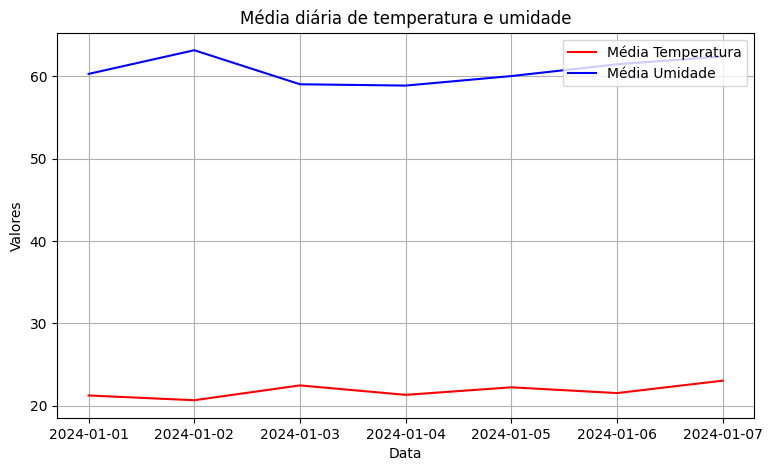

In [11]:
# Plotando a série da média diária de temperatura e umidade
plt.figure(figsize=(9, 5))
plt.plot(df_mean_daily.index, df_mean_daily['Temperature'], label='Média Temperatura', color='red')
plt.plot(df_mean_daily.index, df_mean_daily['Humidity'], label='Média Umidade', color='blue')
plt.title('Média diária de temperatura e umidade')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
